In [104]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

# Video Game Sales Analysis

## 1. Introduction
- This project explores how video game sales have evolved over time, highlighting top-performing genres, games, and platforms across global markets.

## 2. Data Loading
- Kaggle video games sales.csv

## 3. Data Cleaning
- Handle missing values (e.g., missing sales numbers or release years).
- Fix any weird category names if needed (e.g., 'X360' vs 'Xbox 360').

## 4. Exploratory Data Analysis (EDA)
- Overall sales over time
- Top-selling platforms (PlayStation, Xbox, Switch, etc.)
- Top publishers
- Best-selling genres
- Regional differences (e.g., NA vs EU vs Japan)

## 5. Visualizations
- Global Sales over Time
- Top selling platforms overall
- Top 10 games in terms of global sales
- Best selling genres
- Action Sales Trend of over time
- Which platforms perform best in which genres.
- Regional Differences in Sales 

## 6. Key Findings
- Global video games sales peaked in 2008
- PS2 was the best selling console
- Wii Sports was the best selling game exclusive to one console
- Action and Sports games were the most popular genre 
- Action and sports game Sales Trends dropped significantly after 1995
- The PS2 was the most popular platform for action and sports games, while the Xbox 360 was the most popular for shooter games
- North America dominated the global video game sales landscape with over 49% of total sales
  
## 7. Conclusion
- Global video game sales experienced significant growth leading up to a peak in 2008, after which the industry saw a steady decline. Throughout the 1980–2020 timeframe, Wii Sports emerged as the top-selling title, achieving nearly double the sales of the second-highest game. Action and Sports genres dominated global sales during the industry's boom, though both saw notable declines in later years. The PS2 led as the top-selling console overall, particularly strong in Action and Sports genres, while the Xbox 360 stood out for Shooter games. Regionally, North America was the largest market, accounting for nearly half of all global video game sales. These trends reflect how shifts in genre popularity, platform dominance, and regional preferences shaped the industry's trajectory over four decades.

## 8. Limitations
- This dataset ends in 2020 and may not reflect current trends such as the rise of digital-only platforms or mobile gaming.
- Sales data may be incomplete or estimated, especially for older titles or niche markets.
- The dataset does not include detailed regional breakdowns beyond broad areas (NA, EU, JP, Other), limiting finer-grained geographic analysis.
- Genre and platform classifications may be inconsistent or outdated (e.g., "X360" vs. "Xbox 360").

## 9. Next Steps
- Analyze sales trends post-2020 using more recent datasets, especially for platforms like the PS5, Xbox Series X, and Nintendo Switch.
- Incorporate digital sales and mobile games to better reflect modern industry dynamics.
- Explore game ratings (e.g., ESRB or Metacritic) to see how reviews correlate with sales.
- Use machine learning to predict future best-selling genres or forecast platform success based on historical data.
- Deepen regional analysis by incorporating country-level or city-level data if available.




In [106]:
# Load and inspect data 
df = pd.read_csv('video games sales.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [107]:
#Clean dataset 
video_sales = df
vg_sales_clean = df.dropna(subset = ['Publisher', 'EU_Sales', 'JP_Sales','Genre','Platform', 'Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']) # drop NAs
vg_sales_clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [108]:
#Global Video Game Sales Over Time
df['Year'] = df['Year'].astype('Int64') #convert Year from Float to Integer
sales_over_time = vg_sales_clean.groupby('Year')['Global_Sales'].sum().reset_index() #aggregate global sales by year 
sales_over_time

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


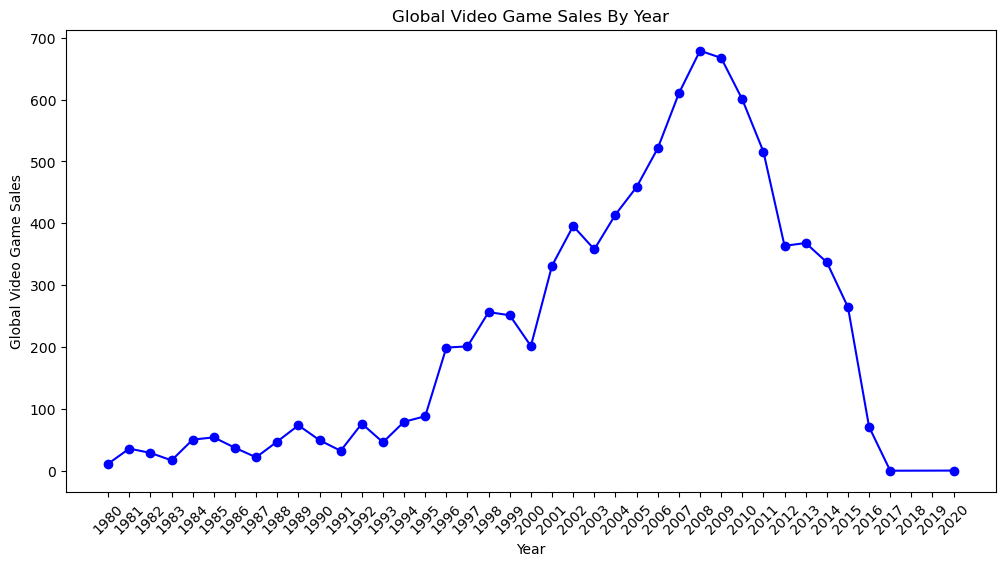

In [109]:
# Global Sales over Time plot
plt.figure(figsize = (12,6))
plt.plot(sales_over_time['Year'], sales_over_time['Global_Sales'], color = 'b', marker = 'o')
plt.title('Global Video Game Sales By Year')
plt.xlabel('Year')
plt.ylabel('Global Video Game Sales')
plt.xticks(ticks=range(1980, 2021, 1), rotation=45) 
plt.show()

In [110]:
# Grouping top selling platforms 
top_selling_platforms = vg_sales_clean.groupby('Platform')['Global_Sales'].sum().reset_index()
top_selling_platforms

,Platform,Global_Sales
0,2600,86.57
1,3DO,0.10
2,3DS,246.27
3,DC,15.97
4,DS,818.91
5,GB,254.42
6,GBA,305.62
7,GC,197.14
8,GEN,28.36
9,GG,0.04


Text(0, 0.5, 'Global Sales (millions)')

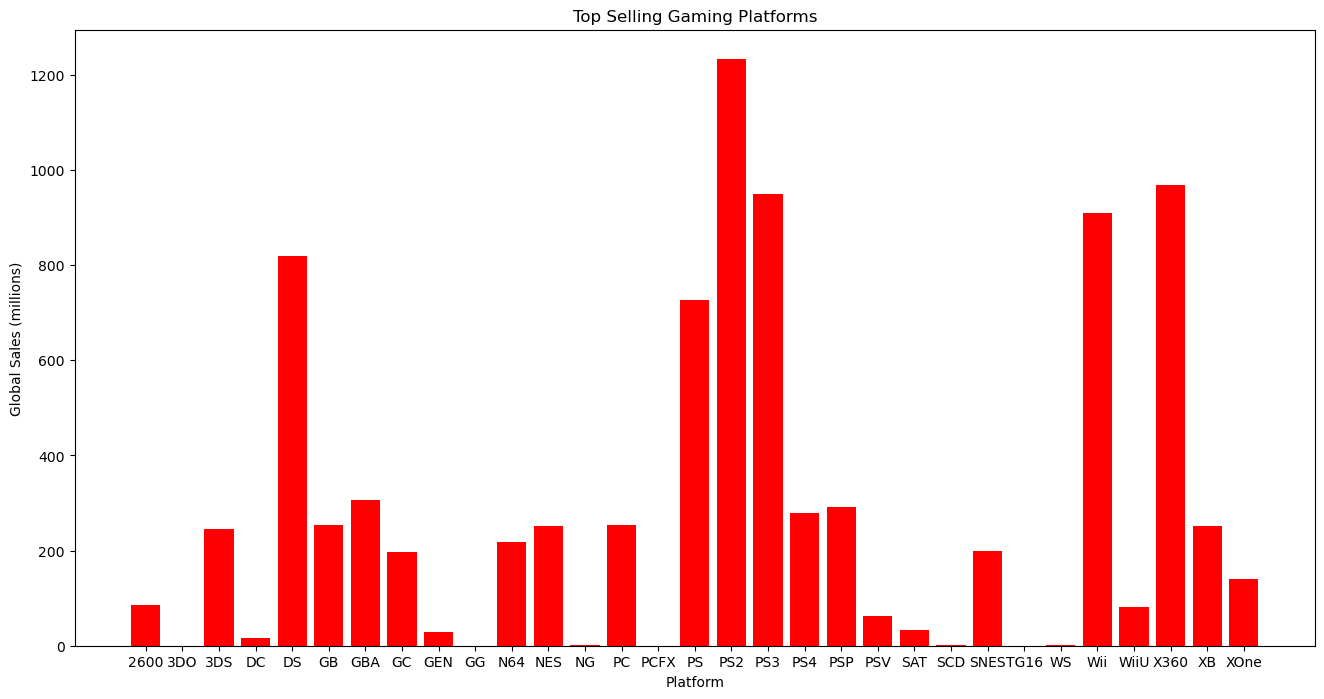

In [111]:
# Top selling platforms bar chart 
plt.figure(figsize = (16,8))
plt.bar(top_selling_platforms['Platform'], top_selling_platforms['Global_Sales'], color = 'r')
plt.title('Top Selling Gaming Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')

In [112]:
#Top Selling Games 
top_selling_games = vg_sales_clean.groupby('Name') ['Global_Sales'].sum().reset_index()
top_selling_games

,Name,Global_Sales
0,'98 Koshien,0.41
1,.hack//G.U. Vol.1//Rebirth,0.17
2,.hack//G.U. Vol.2//Reminisce,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.16
4,.hack//G.U. Vol.3//Redemption,0.17
...,...,...
11320,thinkSMART FAMILY!,0.03
11321,thinkSMART: Chess for Kids,0.01
11322,uDraw Studio,2.46
11323,uDraw Studio: Instant Artist,0.21


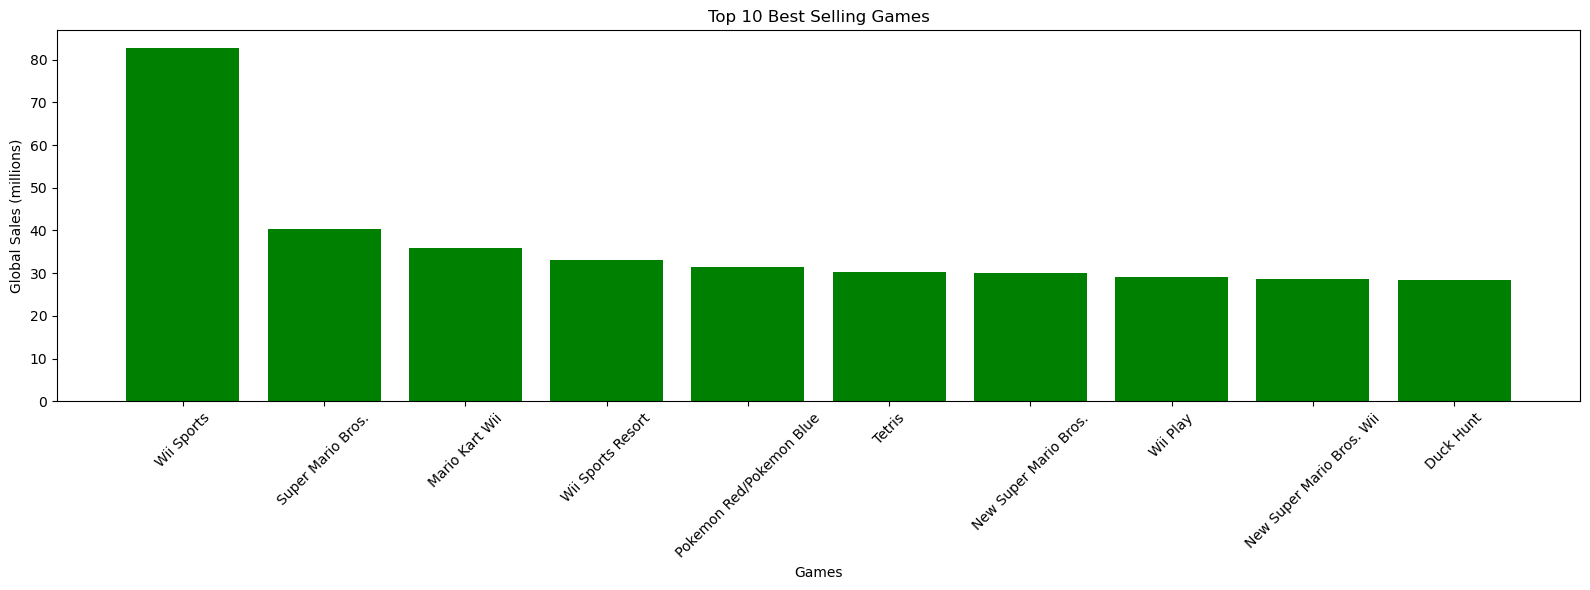

In [113]:
# Sort Games by top 10 global sales 
top_games = vg_sales_clean.sort_values(by='Global_Sales', ascending=False).head(10) # sort games by top 10 global sales 

plt.figure(figsize = (16,6))
plt.bar(top_games['Name'], top_games['Global_Sales'], color = 'g')
plt.title('Top 10 Best Selling Games')
plt.xlabel('Games')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation = 45) # rotates x labels 
plt.tight_layout()
plt.show()

In [114]:
# Best Selling Genres 
top_selling_genres = vg_sales_clean.groupby(['Genre', 'Year']) ['Global_Sales'].sum().reset_index() # group global sales by genre
top_selling_genres

,Genre,Year,Global_Sales
0,Action,1980.0,0.34
1,Action,1981.0,14.84
2,Action,1982.0,6.52
3,Action,1983.0,2.86
4,Action,1984.0,1.85
...,...,...,...
384,Strategy,2012.0,3.33
385,Strategy,2013.0,6.33
386,Strategy,2014.0,0.99
387,Strategy,2015.0,1.82


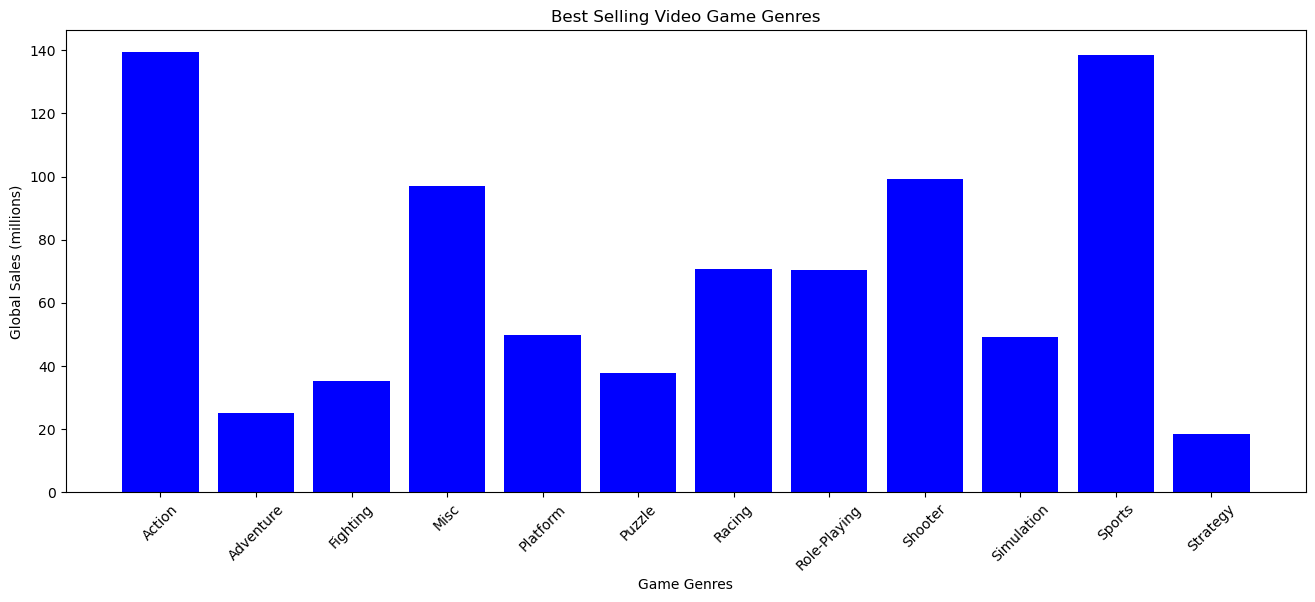

In [115]:
#Best selling genres bar graph 
plt.figure(figsize = (16,6))
plt.bar(top_selling_genres['Genre'], top_selling_genres['Global_Sales'], color = 'b')
plt.xlabel('Game Genres')
plt.ylabel('Global Sales (millions)')
plt.title('Best Selling Video Game Genres')
plt.xticks(rotation = 45)
plt.show()

In [116]:
#How have sales trends evolved over time for different video game genres?"

#Calculate total global sales per genre
top_genres = vg_sales_clean.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(2).index
top_genres

#Filter the grouped data to include only the top 2 genres
df_top2 = vg_sales_clean[vg_sales_clean['Genre'].isin(top_genres)]
df_top2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
...,...,...,...,...,...,...,...,...,...,...,...
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01
16587,16590,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01


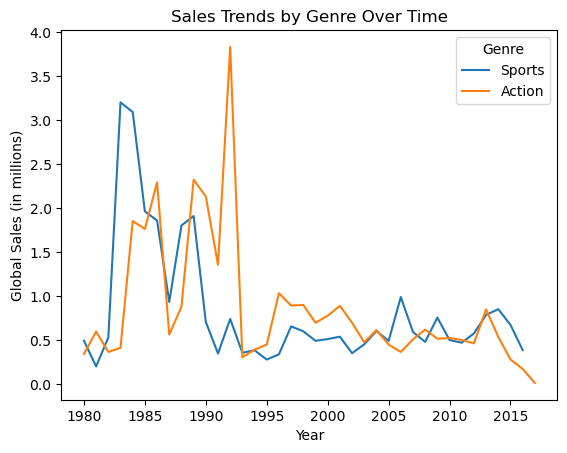

In [117]:
# Visualize Action and sports game Sales Trends of over time
sns.lineplot(data=df_top2, x='Year', y='Global_Sales', hue='Genre', errorbar=None)
plt.title('Sales Trends by Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

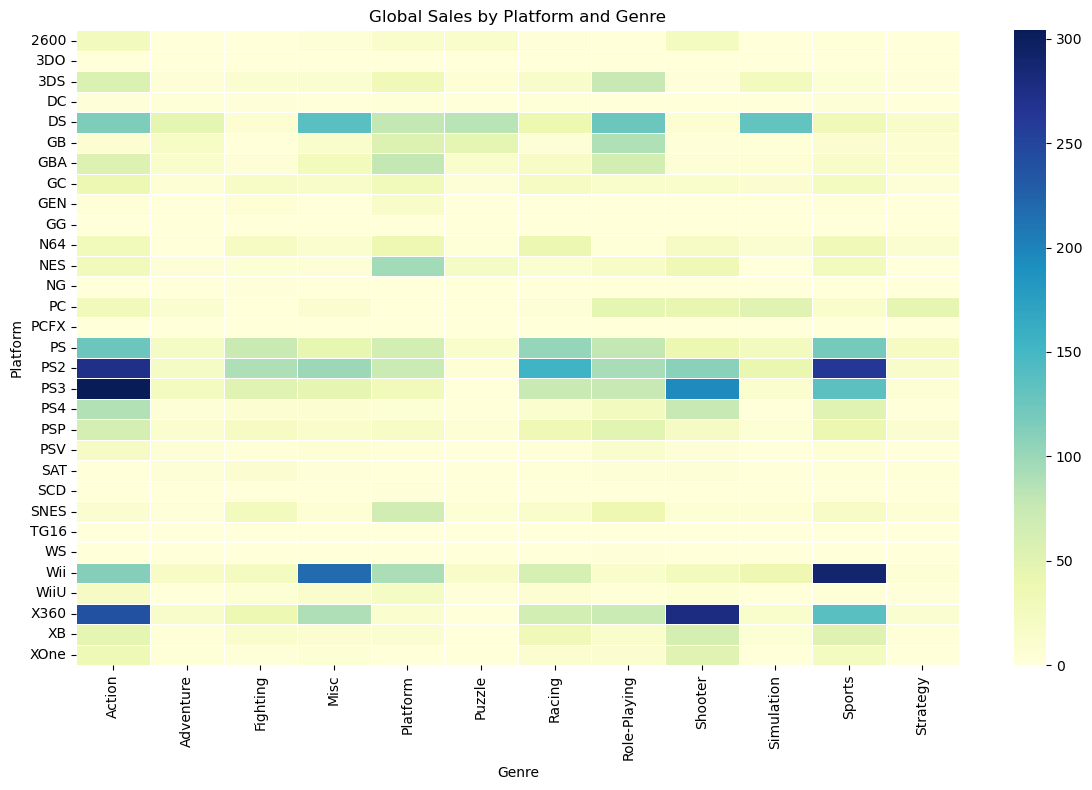

In [118]:
#Which platforms dominate which genres in terms of sales?
platform_genre_pivot_table = vg_sales_clean.pivot_table(
    index='Platform',
    columns='Genre',
    values='Global_Sales',
    aggfunc='sum',
    fill_value=0
)

#Heatmap to show which platforms perform best in which genres.
plt.figure(figsize=(12, 8))
sns.heatmap(platform_genre_pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Global Sales by Platform and Genre')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [119]:
#Regional Differences in Sales 
regional_sales = {
    'North America': vg_sales_clean['NA_Sales'].sum(),
    'Europe': vg_sales_clean['EU_Sales'].sum(),
    'Japan': vg_sales_clean['JP_Sales'].sum(),
    'Other': vg_sales_clean['Other_Sales'].sum()}

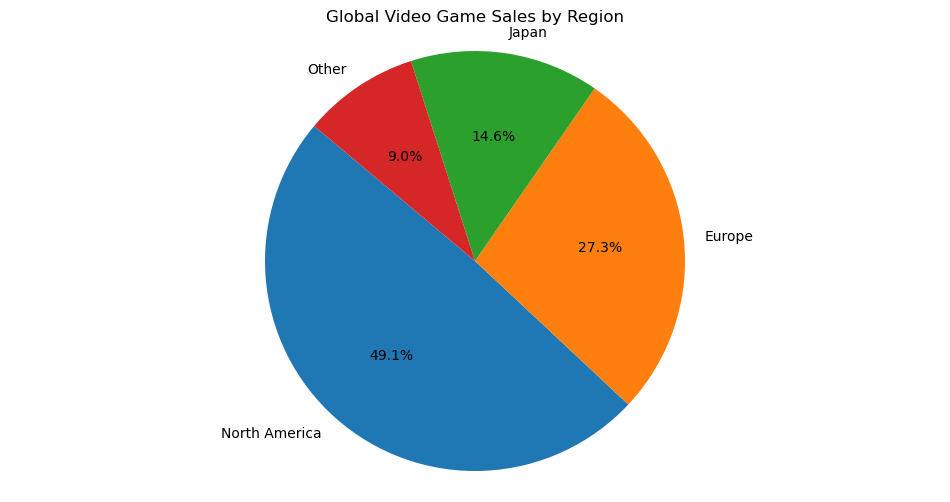

In [120]:
plt.figure(figsize = (12,6))
plt.pie(regional_sales.values(), labels=regional_sales.keys(), startangle=140,  autopct='%1.1f%%')
plt.title('Global Video Game Sales by Region')
plt.axis('equal')
plt.show()